# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

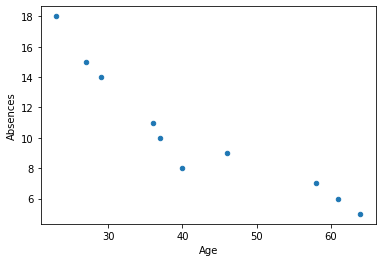

In [4]:
data.plot(x='Age', y='Absences', kind= 'scatter')

In [5]:
# your comments here
#It seems that as age increases the number of absences decreases

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [6]:
# your code here
def substract_mean(X):
    x_mean = np.mean(X)
    #print(x_mean)
    return [elem - x_mean for elem in X]
#print(substract_mean(X))

In [7]:
def substract_mean(Y):
    y_mean = np.mean(Y)
    #print(y_mean)
    return [elem - y_mean for elem in Y]
#print( substract_mean(Y) )

In [8]:
def sum_subtract_mean(X,Y):
    X = substract_mean(X)
    Y = substract_mean(Y)
    #print(X)
    #print(Y)
    sum1 = 0
    for x,y in zip(X,Y):
        #print('x = ', x,' y = ', y)
        sum1 = sum1 + x*y
    return sum1

In [9]:
def substract_mean_squared(X):
    x_mean = np.mean(X)
    #print(x_mean)
    return sum([(elem - x_mean)**2 for elem in X])
#print(substract_mean_squared(X))

#### Slope

In [10]:
m = sum_subtract_mean(X,Y) / substract_mean_squared(X)
m

-0.2681088337033404

#### Intercept

In [11]:
b = m*X[0]+Y[0]
b

7.76106149000981

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

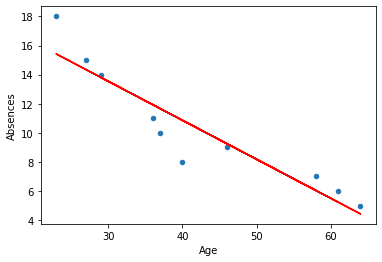

In [16]:
# your code here
X = data[['Age']]
Y = data['Absences']

clf = LinearRegression()
clf.fit(X,Y)
data.plot(x='Age', y='Absences', kind= 'scatter')
plt.plot(data['Age'], clf.predict(X), color='red')

In [15]:
print('y = mx + b')
print('y =', round(m,2), 'x +', round(b))

y = mx + b
y = -0.27 x + 8.0


In [16]:
# your comments here
# It seems that Age and Absences have a moderate/high negative correlation 

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [17]:
X = data['Age']
Y = data['Absences']

In [18]:
# your code here
def get_covar(X,Y):
    n = len(X)
    X = substract_mean(X)
    Y = substract_mean(Y)    
    return sum(i*j for i,j in zip(X,Y))/(n-1)

In [19]:
def correlation(X, Y):
    s_x = np.std(X, ddof=1)
    s_y = np.std(Y, ddof=1)
    #print(s_x)
    #print(s_y)
    return get_covar(X,Y) / (s_x * s_y)

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [20]:
# your code here
print('The covariance is: ', get_covar(X,Y))
print('The correlation is: ', correlation(X,Y))

The covariance is:  -57.699999999999996
The correlation is:  -0.9325434092481012


In [21]:
# your comments here
# It reaffirms our assumption that Age and Absences have a moderate/high negative correlation  

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [22]:
# your comments here
print('The average age is: ', np.mean(X))
print('The average number of absences is: ', np.mean(Y))
print('The slope of the linear regression line is: m=', m)
print('The intercept of the linear regression line is: b=', b)
print('The covariance is: ', get_covar(X,Y))
print('The correlation is: ', correlation(X,Y))
print('There is a clear high negative correlation between Age and Absences')
print('The younger you are the more likely it is you will miss work!')

The average age is:  42.1
The average number of absences is:  10.3
The slope of the linear regression line is: m= -0.2681088337033404
The intercept of the linear regression line is: b= 7.76106149000981
The covariance is:  -57.699999999999996
The correlation is:  -0.9325434092481012
There is a clear high negative correlation between Age and Absences
The younger you are the more likely it is you will miss work!


## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [23]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [24]:
#your code here

ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [25]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [26]:
# your comments here
# The assumption was wrong since both X and Y are positively correalted indicating that the more people you tell to stay will in fact stay

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

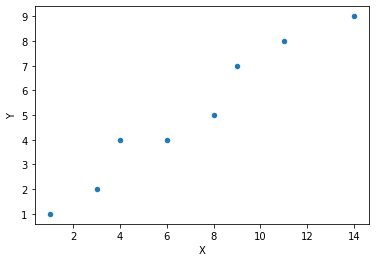

In [27]:
# your code here
X = ironbeers_df[['X']]
Y = ironbeers_df['Y']

ironbeers_df.plot(x='X', y='Y', kind= 'scatter')

In [28]:
# your comments here
# Both X and Y are strongly positively correlated

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [29]:
clf = LinearRegression()
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# your code here
m = clf.coef_[0]
b = clf.intercept_
print('y = mx + b')
print('y =', round(m,2), 'x +', round(b))

y = mx + b
y = 0.64 x + 1.0


In [31]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [32]:
# your comments here
# The lack of available data makes this question impossible to answer. But yeah, probably it is.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [33]:
# your code here

ironbeers_df['expected_Y'] = [((x*m)+b) for x in ironbeers_df['X']]
ironbeers_df

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

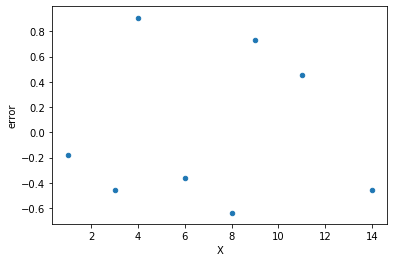

In [34]:
# your code here
ironbeers_df['error'] = ironbeers_df['Y'] - ironbeers_df['expected_Y']

X = ironbeers_df[['X']]
Y = ironbeers_df['error']

ironbeers_df.plot(x='X', y='error', kind= 'scatter')


#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [36]:
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


In [ ]:
# your comments here
# There is clear outliers at X = 4 & X = 9 where the error margin is almost 1 & 0.7 respectiveley

#### 4.- Remove the points with a high error and recalculate the regression line.

In [40]:
# your code here

ironbeers_df_2 = ironbeers_df.drop([2,5], axis=0)

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [41]:
# your code here
ironbeers_df_2.corr()

,X,Y,expected_Y,error
X,1.000000,0.992856,1.000000,0.164384
Y,0.992856,1.000000,0.992856,0.280904
expected_Y,1.000000,0.992856,1.000000,0.164384
error,0.164384,0.280904,0.164384,1.000000


In [ ]:
# your comments here
# Correlation goes from 0.97 to 0.99